In [21]:
# Declare an empty list 
city_data = []

In [22]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [23]:
from citipy import citipy

In [24]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [25]:
weather_api_key="663bc986e0f24e968eb8e5e84d5aebbb"

In [26]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=663bc986e0f24e968eb8e5e84d5aebbb


In [27]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [28]:
# Create an empty list to hold the weather data. 
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [29]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [30]:
# Create a list for holding the cities.
cities = []


# Identify nearest city for each latitude and longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [31]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [32]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(30)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                    "Lat": city_lat,
                    "Lng": city_lng,
                    "Max Temp": city_max_temp,
                    "Humidity": city_humidity,
                    "Cloudiness": city_clouds,
                    "Wind Speed": city_wind,
                    "Country": city_country,
                    "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | awbari
Processing Record 2 of Set 13 | khatanga
Processing Record 3 of Set 13 | samarai
Processing Record 4 of Set 13 | kavieng
Processing Record 5 of Set 13 | vaini
Processing Record 6 of Set 13 | narsaq
Processing Record 7 of Set 13 | hermanus
Processing Record 8 of Set 13 | richards bay
Processing Record 9 of Set 13 | grindavik
Processing Record 10 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 13 | bluff
Processing Record 12 of Set 13 | tafresh
Processing Record 13 of Set 13 | mehtar lam
Processing Record 14 of Set 13 | kidal
Processing Record 15 of Set 13 | georgetown
Processing Record 16 of Set 13 | aktash
Processing Record 17 of Set 13 | albany
Processing Record 18 of Set 13 | avarua
Processing Record 19 of Set 13 | bengkulu
Processing Record 20 of Set 13 | kushima
Processing Record 21 of Set 13 | tsihombe
City not found. Skipping...
Processing Record 22 of Set 13 | amderma
City not found. Skipping...
Processing Reco

In [33]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Awbari,26.5921,12.7805,49.60,59,0,6.33,LY,2023-01-05 01:04:27
1,Khatanga,71.9667,102.5000,-43.65,100,94,2.75,RU,2023-01-05 01:04:28
2,Samarai,-10.6167,150.6667,83.61,73,100,7.16,PG,2023-01-05 01:04:28
3,Kavieng,-2.5744,150.7967,84.06,66,61,2.57,PG,2023-01-05 01:04:29
4,Vaini,-21.2000,-175.2000,84.36,79,75,14.97,TO,2023-01-05 01:04:30
5,Narsaq,60.9167,-46.0500,34.02,69,100,15.05,GL,2023-01-05 01:03:17
6,Hermanus,-34.4187,19.2345,56.80,65,100,13.13,ZA,2023-01-05 01:04:31
7,Richards Bay,-28.7830,32.0377,72.72,93,99,14.09,ZA,2023-01-05 01:04:31
8,Grindavik,63.8424,-22.4338,25.27,74,0,8.05,IS,2023-01-05 01:04:32
9,Bluff,-46.6000,168.3333,59.25,94,100,5.17,NZ,2023-01-05 01:04:33


In [34]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [35]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1672886077.028511

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig1.png'

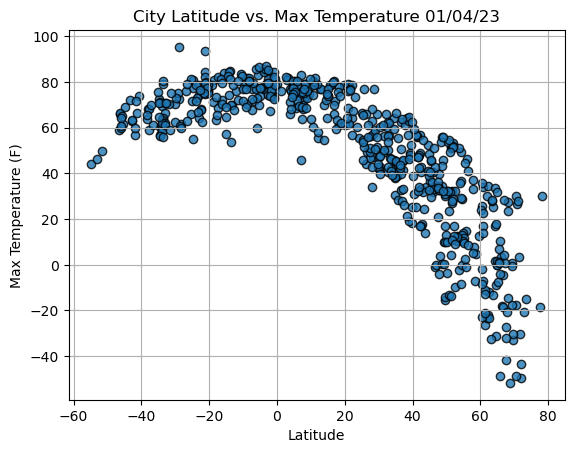

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig2.png'

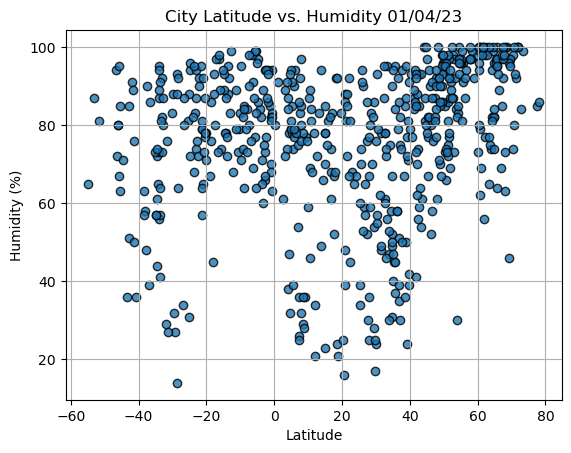

In [38]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig2.png'

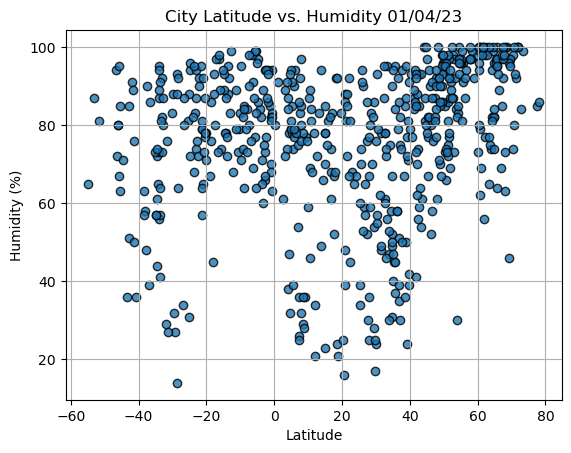

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig3.png'

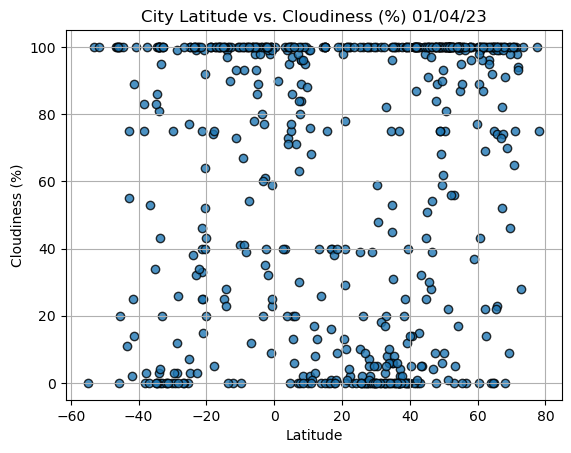

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'weather_data/Fig4.png'

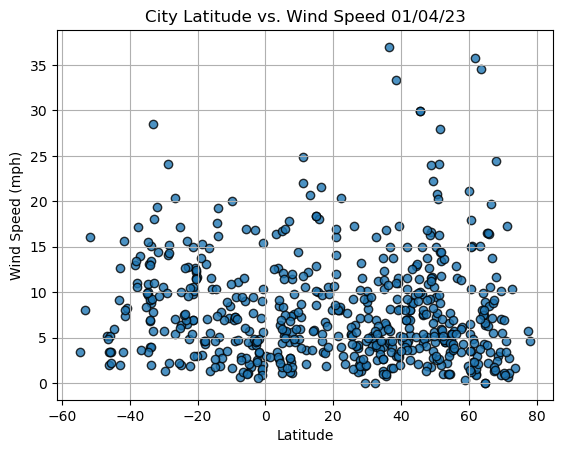

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()